## Лабораторная работа №6

### Визуализация данных

Загружаем в pandas любой набор данных, в котором есть как минимум пара числовых колонок и как минимум одна категориальная с небольшим числом категорий. Опишите ваши данные, что обозначает каждый столбец, какого типа (категориальный, вещественный, целочисленный, бинарный) данный столбец, при необходимости для категориальных в том числе бинарных признаков привести расшифровку их значений. В общем, проведите "визуальный" анализ ваших данных.

Name — название игры

Platform — платформа 

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы долларов)

EU_sales — продажи в Европе (миллионы долларов)

JP_sales — продажи в Японии (миллионы долларов)

Other_sales — продажи в других странах (миллионы долларов)

Critic_Score — оценка критиков (от 0 до 100)

User_Score — оценка пользователей (от 0 до 10)

Rating — рейтинг от организации ESRB (возростная категория)

In [9]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot

In [147]:
games = pd.read_csv('games.csv')

df_games = pd.DataFrame(data=games)

df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [148]:
df_games = df_games.dropna()

#### 1 Matplotlib

1.1 Построить любой график (любого рода) с помощью чистого matplotlib / pylab

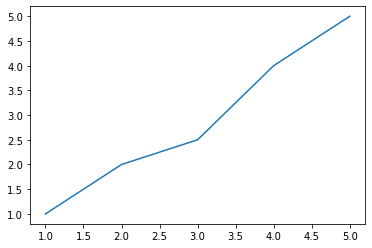

In [7]:
plt.plot([1, 2, 3, 4, 5], [1, 2, 2.5, 4, 5])
plt.show()

1.2 Построить несколько суб-графиков на одном графике используя .subplot.

Графики должны быть разных типов и хотя бы два из них должны быть связаны с вашим датасетом. Хотя бы в одном графике подпишите оси. Во всех графиках подписать название графика.

Text(0.5, 0, 'Год выпуска')

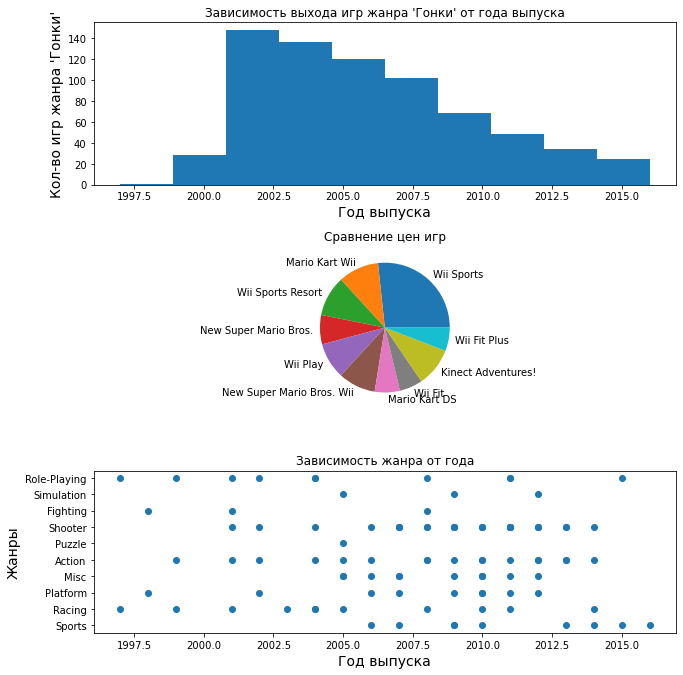

In [64]:
# Гистограмма
plt.figure(figsize=(9, 9))
plt.subplot(3, 1, 1)
plt.hist(df_games[df_games['Genre'] == 'Racing']['Year_of_Release']) 
plt.title("Зависимость выхода игр жанра 'Гонки' от года выпуска") 
plt.ylabel("Кол-во игр жанра 'Гонки'", fontsize=14)
plt.xlabel("Год выпуска", fontsize=14)
plt.tight_layout()

# Круговая диаграмма
plt.subplot(3, 1, 2)
labels = df_games.head(10)['Name']
values = df_games.head(10)['NA_sales']
plt.pie(values,labels=labels)
plt.title('Сравнение цен игр')
plt.tight_layout()

# Точечный график
plt.subplot(3, 1, 3)
x = df_games.head(100)['Year_of_Release']
y = df_games.head(100)['Genre']
plt.scatter(x,y)
plt.title("Зависимость жанра от года") 
plt.ylabel("Жанры", fontsize=14)
plt.xlabel("Год выпуска", fontsize=14)



#### 2 На основе Вашего датасета построить три разных вида графиков используя pandas.DataFrame.plot / Series.plot (мануал) 
Среди графиков должен присутствовать один boxplot (обязательно надо использовать параметр by, для исследования взаимосвязи числовой переменной и какой-либо другой). Графики должны быть построены как через методы DataFrame, так и через методы Series. То есть оба варианта нужно продемонстрировать.

DataFrame.plot

<AxesSubplot:title={'center':'Плотность распределения оценок критиков'}, ylabel='Density'>

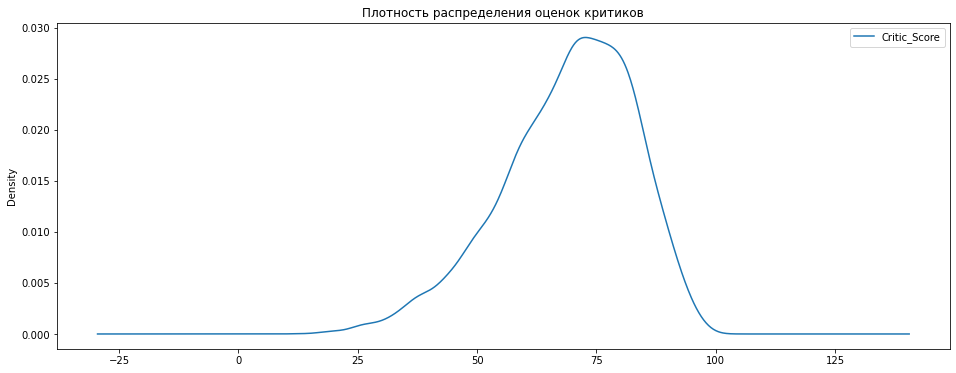

In [127]:
df_games.plot(kind='density',y='Critic_Score', figsize=(16,6), title = 'Плотность распределения оценок критиков')

EU_sales       AxesSubplot(0.125,0.125;0.227941x0.755)
JP_sales    AxesSubplot(0.398529,0.125;0.227941x0.755)
NA_sales    AxesSubplot(0.672059,0.125;0.227941x0.755)
dtype: object

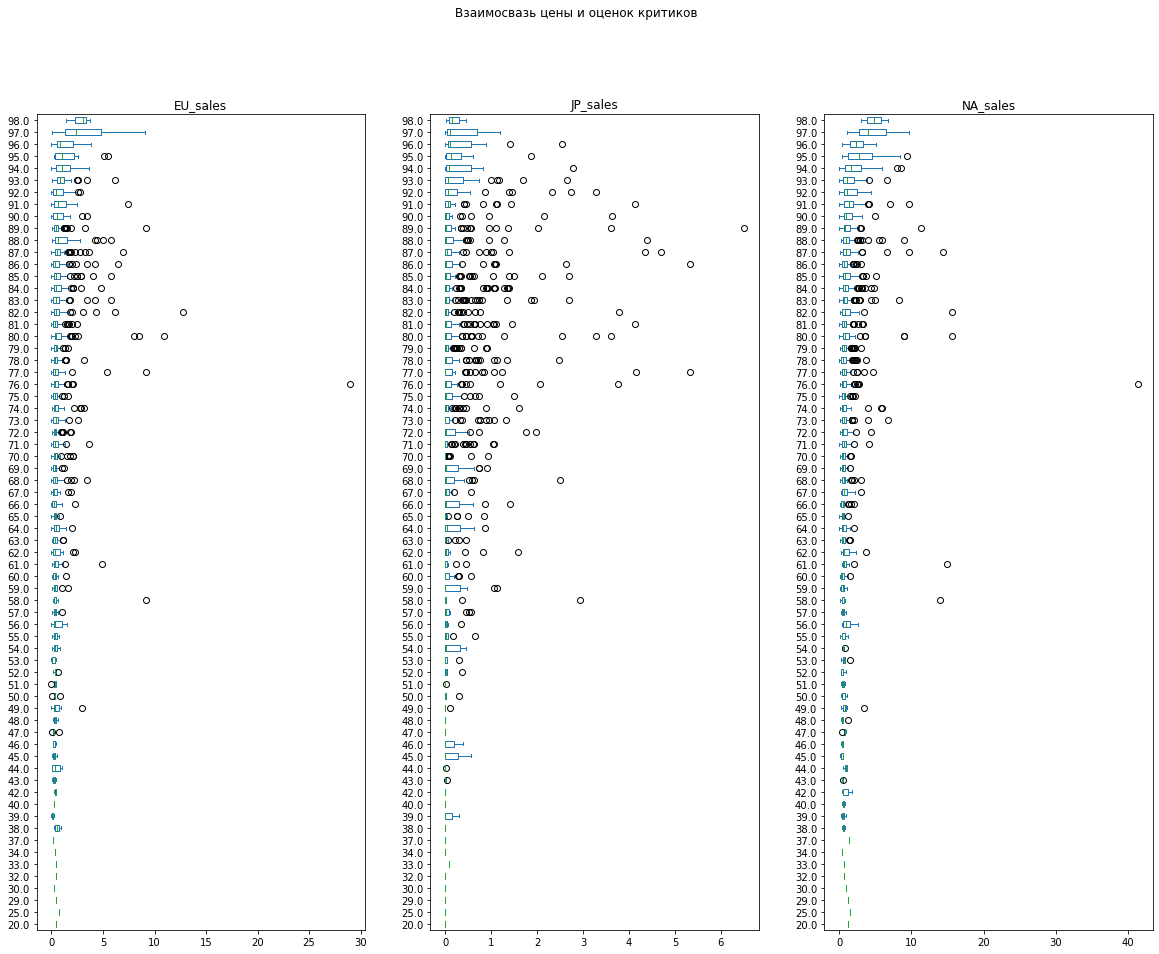

In [108]:
df = df_games.head(2000)[['NA_sales','EU_sales','JP_sales', 'Critic_Score']].copy()
df.plot(kind='box', vert=False, by = 'Critic_Score', figsize=(20,15), title = 'Взаимосвазь цены и оценок критиков')

<AxesSubplot:title={'center':'Зависимость цен'}, xlabel='NA_sales', ylabel='EU_sales'>

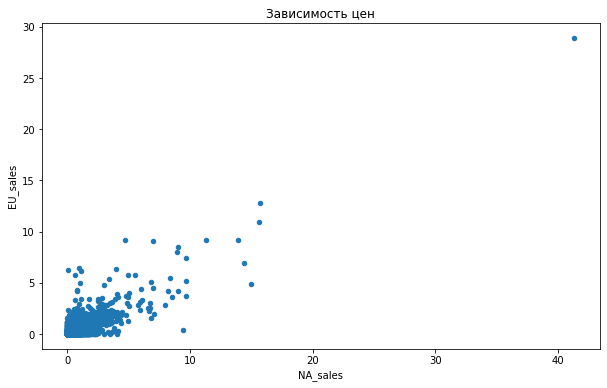

In [130]:
df_games.plot(kind = 'scatter', y='EU_sales', x='NA_sales',  figsize=(10,6), title='Зависимость цен')

Series.plot

<AxesSubplot:ylabel='Density'>

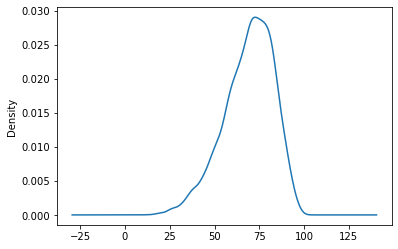

In [135]:
ser = pd.Series(df_games['Critic_Score'])
  
ser.plot.kde()

#### 3 Seaborn

3.1 Построить .pairplot с помощью seaborn на каком-либо наборе данных, проанализировав взаимосвязь набора числовых переменных

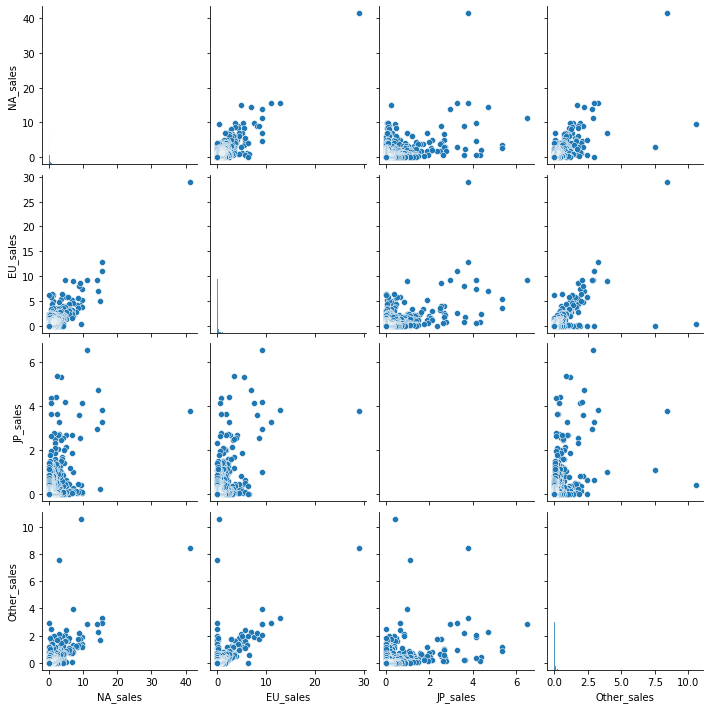

In [152]:
df_sea = df_games.drop(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Critic_Score', 'User_Score', 'Rating'], axis= 1 , inplace= False )
sns.pairplot(df_sea)

3.2 Построить .jointplot, проанализировав взаимосвязь двух конкретных числовых переменных

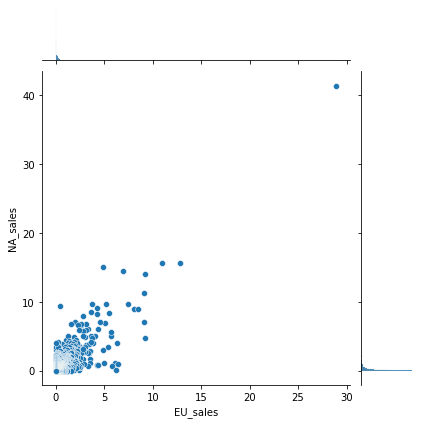

In [156]:
sns.jointplot(data=df_sea, x='EU_sales', y='NA_sales')

3.3 Построить .boxplot или .violinplot на каком-либо наборе данных, проанализировав какой-то числовой показатель в разрезе категориального

<AxesSubplot:xlabel='EU_sales', ylabel='Genre'>

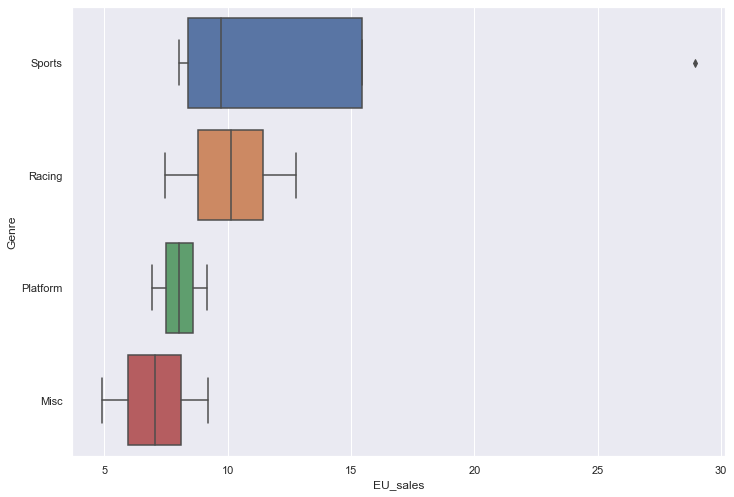

In [159]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(data=df_games.head(10), x="EU_sales", y="Genre")

3.4 Построить график heatmap попарной корреляции всех числовых признаков (категориальные признаки убираете из графика)

<AxesSubplot:>

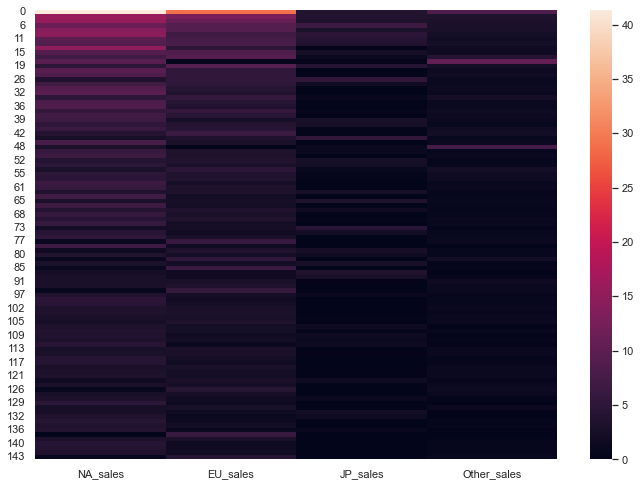

In [161]:
df_sea.sort_values(by='NA_sales')
sns.heatmap(df_sea.head(100).select_dtypes(include='float64'))

#### 4 Построить любой график (связанный с вашими данными) с помощью plotly

In [171]:
labels = df_games['Genre']
values = df_games['NA_sales']
fig = go.Figure()
fig.add_trace(go.Pie(values=values, labels=labels, title='Суммарная стоимость игр жанра'))
fig.show()